In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://apache.osuosl.org/spark/spark-3.1.1/spark-3.1.1-bin-hadoop2.7.tgz
!tar xf spark-3.1.1-bin-hadoop2.7.tgz
!pip install -q findspark

E: Failed to fetch http://security.ubuntu.com/ubuntu/pool/universe/o/openjdk-8/openjdk-8-jre-headless_8u282-b08-0ubuntu1~18.04_amd64.deb  404  Not Found [IP: 91.189.88.142 80]
E: Failed to fetch http://security.ubuntu.com/ubuntu/pool/universe/o/openjdk-8/openjdk-8-jdk-headless_8u282-b08-0ubuntu1~18.04_amd64.deb  404  Not Found [IP: 91.189.88.142 80]
E: Unable to fetch some archives, maybe run apt-get update or try with --fix-missing?


In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop2.7"

In [ ]:
import findspark
import string
findspark.init()
from pyspark.sql import SparkSession
from pyspark import SparkConf
from pyspark import SparkContext

spark = SparkSession.builder.appName("Depression").getOrCreate()

sc = spark.sparkContext

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = spark.read.option("header", "true").option("multiLine", "true").option("quote", "\"").option("escape", "\"").option("inferSchema", "true").csv('/content/drive/MyDrive/490/Cleaned_Depression_Vs_Suicide.csv')
df.show()

+--------------------+------------+
|                text|       class|
+--------------------+------------+
|Feeling a bit dep...|SuicideWatch|
|Was going to hang...|SuicideWatch|
|Have you ever mai...|  depression|
|I haven't felt po...|  depression|
|Partners of those...|  depression|
|I'm worthless.I'v...|SuicideWatch|
|What's the best w...|SuicideWatch|
|I just want to fu...|SuicideWatch|
|Help with Nightma...|  depression|
|My depression has...|SuicideWatch|
|Can anyone relate...|  depression|
|Permanently miser...|SuicideWatch|
|I have been havin...|SuicideWatch|
|Reaching outSomeo...|SuicideWatch|
|I'm sure someone ...|  depression|
|Settings goals is...|  depression|
|I'm just tired   ...|  depression|
|I can’t stop cryi...|SuicideWatch|
|Hey Reddit.My nam...|  depression|
|i'm so fucking st...|SuicideWatch|
+--------------------+------------+
only showing top 20 rows



In [ ]:
totale_rows = df.count() # The total amount of posts we have 
df.count()

609772

In [ ]:
post_lengths = df.rdd.map(lambda x: len(x.text))
post_lengths.take(10) # Show the lengths of the first 10 posts


[481, 572, 1219, 516, 649, 567, 267, 83, 350, 1745]

In [ ]:
print(post_lengths.stats())

(count: 609772, mean: 1176.795928642231, stdev: 1422.9257077693858, max: 40297.0, min: 2.0)


In [ ]:
texts = df.rdd.map(lambda x : x.text)
texts.take(5)


["Feeling a bit depressedI've been in a big low all weekend. I don't know why death has actually crossed my mind a few times. I don't care to admit it to any of my friend because I feel disconnected from everyone. I feel so lonely, yet I feel so overwhelmed that I can't really talk to anyone. I've been pretty isolated for the past few days, mostly doing work. \n\nI just want someone to talk to, it doesn't have to be about depression. I'm a male college student, about to graduate. ",
 "Was going to hang myself but didn't have guts enough to kick away the chairI was all set to hang myself this morning. Had the noose around my neck, was standing on the chair, the whole nine yards.\n\nI just couldn't get the guts to kick away the chair.\n\nFeel more down and hopeless now than ever.\n\nHave tried to kill myself many times before mainly with drug overdoses. Not going to go that route though is that it'll likely just result in a long hospitalization against my will.\n\nLife has become intoler

In [ ]:
def lower_clean_str(x):
  lowercased_str = x.lower()
  for ch in string.punctuation:
    lowercased_str = lowercased_str.replace(ch, '')
  return lowercased_str

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = stopwords.words("english")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
print('a' in stop)

True


In [ ]:
def filter(word):
   if word not in stop:
    return word

In [ ]:
words = texts.flatMap( lambda post: post.split(" ")).map(lambda x: filter(x)).filter(lambda x: x is not None).filter(lambda x: x != "")
words.take(5)



['feeling', 'bit', 'depressedive', 'big', 'low']

In [ ]:
word_count = words.map( lambda word: (word, 1)).reduceByKey(lambda x, y: x + y).sortBy(lambda pair: pair[1], ascending = False)
word_count.take(10)

[('im', 1202526),
 ('dont', 833336),
 ('like', 810509),
 ('feel', 704298),
 ('want', 627313),
 ('know', 609032),
 ('life', 547364),
 ('get', 517916),
 ('ive', 438814),
 ('even', 432674)]

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_cloud_df = spark.createDataFrame(word_count)

word_cloud_df.show()

+------+-------+
|    _1|     _2|
+------+-------+
|    im|1202526|
|  dont| 833336|
|  like| 810509|
|  feel| 704298|
|  want| 627313|
|  know| 609032|
|  life| 547364|
|   get| 517916|
|   ive| 438814|
|  even| 432674|
|  time| 426501|
|really| 416692|
|people| 410211|
|  cant| 402223|
| would| 378815|
|   one| 373920|
| think| 319247|
| going| 316714|
| never| 314062|
|    go| 309134|
+------+-------+
only showing top 20 rows



In [ ]:
import numpy
import pandas

def wordcloud(corpus_sdf):
    corpus_pdf = corpus_sdf.limit(500).toPandas()

    corpus_dict = {}
    for index, row in corpus_pdf.iterrows():
        corpus_dict[row['_1']] = row['_2']
        
    wordcloud = WordCloud().generate_from_frequencies(corpus_dict)
    plt.imshow(wordcloud);

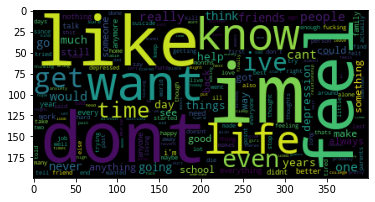

In [ ]:
wordcloud(word_cloud_df)